<a href="https://colab.research.google.com/github/MUKWAYAN/DeepLearning_imageClassification/blob/main/imageClassificationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [31]:
from tensorflow import keras
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from PIL import Image

In [190]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest')
val_datagen = ImageDataGenerator( rescale=1./255,
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [219]:


train_generator = train_datagen.flow_from_directory(
    "/content/gdrive/MyDrive/Deep Learning/Dataset1/train/", target_size=(256,256), color_mode="grayscale", batch_size=32,class_mode='binary')


validation_generator = val_datagen.flow_from_directory(
    "/content/gdrive/MyDrive/Deep Learning/Dataset1/validation/", target_size=(256,256),color_mode="grayscale", batch_size=32,class_mode='binary')
	
test_generator = test_datagen.flow_from_directory(
     "/content/gdrive/MyDrive/Deep Learning/Dataset1/validation/", target_size=(256,256),color_mode="grayscale",batch_size=32,class_mode='binary')  

x_test=[]
test_path = "/content/gdrive/MyDrive/Deep Learning/Dataset1/validation";
for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)

        img_arr=cv2.resize(img_arr,(256,256))

        x_test.append(img_arr)

Found 525 images belonging to 2 classes.
Found 190 images belonging to 2 classes.
Found 190 images belonging to 2 classes.


In [159]:
print("- Test-set:\t\t{}".format(len(train_generator)))

- Test-set:		11


In [220]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(256,256,1)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Flatten(input_shape=(256,256)),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_112 (Conv2D)         (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_112 (MaxPooli  (None, 127, 127, 32)     0         
 ng2D)                                                           
                                                                 
 conv2d_113 (Conv2D)         (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_113 (MaxPooli  (None, 62, 62, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_114 (Conv2D)         (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_114 (MaxPooli  (None, 30, 30, 128)    

In [221]:
model.compile(optimizer='RMSProp', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
            


In [222]:
history = model.fit(train_generator, steps_per_epoch = 11, epochs=10, validation_data=validation_generator, validation_steps=3)

Epoch 1/10
11/11 [==============================] - 53s 5s/step - loss: 0.7358 - accuracy: 0.5465 - val_loss: 0.6354 - val_accuracy: 0.7083
Epoch 2/10
11/11 [==============================] - 51s 5s/step - loss: 0.7442 - accuracy: 0.6396 - val_loss: 0.7216 - val_accuracy: 0.3542
Epoch 3/10
11/11 [==============================] - 53s 5s/step - loss: 0.6658 - accuracy: 0.6619 - val_loss: 0.5950 - val_accuracy: 0.7500
Epoch 4/10
11/11 [==============================] - 52s 5s/step - loss: 0.4543 - accuracy: 0.8198 - val_loss: 0.5962 - val_accuracy: 0.7188
Epoch 5/10
11/11 [==============================] - 51s 5s/step - loss: 0.6070 - accuracy: 0.7508 - val_loss: 0.4778 - val_accuracy: 0.7708
Epoch 6/10
11/11 [==============================] - 52s 5s/step - loss: 0.5554 - accuracy: 0.7237 - val_loss: 0.3385 - val_accuracy: 0.8958
Epoch 7/10
11/11 [==============================] - 50s 4s/step - loss: 0.4290 - accuracy: 0.8138 - val_loss: 0.4285 - val_accuracy: 0.8125
Epoch 8/10
11/11 [==

In [217]:
test_x=np.array(x_test)
test_x=test_x/255.0
test_y=test_generator.classes
#print(test_generator)
model.evaluate(test_x,test_y)

6/6 [==============================] - 7s 1s/step - loss: 1.1071 - accuracy: 0.3421


[1.1070579290390015, 0.34210526943206787]

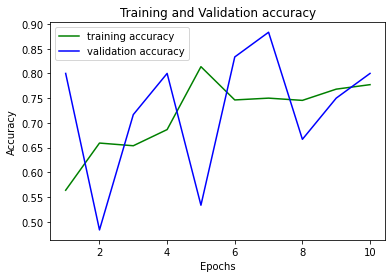

In [197]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,11)
# print("- Test-set:\t\t{}".format(len(acc_train)))
plt.plot(epochs,acc_train, 'g', label='training accuracy')
plt.plot(epochs, acc_val, 'b', label= 'validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
model.save('sick_normal_model.h5')

In [40]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,1)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

model.load_weights("sick_normal_model.h5")

In [218]:


mypath = "/content/gdrive/MyDrive/Deep Learning/Dataset1/train/sick/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

for image_file in onlyfiles:
    img = image.load_img(mypath + image_file,  target_size=(256,256),color_mode="grayscale")
    x = image.img_to_array(img)
    x = x.reshape((1,)+x.shape)
    #print(x)
    print(model.predict(x))
    if model.predict(x) < 0.3:
       print(image_file + ": Must be normal")
    if model.predict(x) > 0.7:
        print(image_file + ": Must be sick")
    if model.predict(x) > 0.3 and model.predict(x) < 0.7:
        print(image_file + ": Not sure if its sick or normal")

[[2.2313276e-23]]
sick_318.png: Must be normal
[[2.319534e-14]]
sick_235.png: Must be normal
[[1.]]
sick_230.png: Must be sick
[[1.]]
sick_280.png: Must be sick
[[8.039423e-13]]
sick_116.png: Must be normal
[[0.]]
sick_342.png: Must be normal
[[1.]]
sick_131.png: Must be sick
[[0.]]
sick_141.png: Must be normal
[[0.]]
sick_213.png: Must be normal
[[1.]]
sick_222.png: Must be sick
[[1.]]
sick_311.png: Must be sick
[[0.]]
sick_200.png: Must be normal
[[1.]]
sick_123.png: Must be sick
[[1.]]
sick_197.png: Must be sick
[[1.]]
sick_173.png: Must be sick
[[0.]]
sick_78.png: Must be normal
[[1.]]
sick_215.png: Must be sick
[[1.]]
sick_307.png: Must be sick
[[1.]]
sick_108.png: Must be sick
[[1.]]
sick_217.png: Must be sick
[[8.4911e-31]]
sick_186.png: Must be normal
[[4.399277e-25]]
sick_145.png: Must be normal
[[0.]]
sick_103.png: Must be normal
[[1.]]
sick_370.png: Must be sick
[[1.]]
sick_101.png: Must be sick
[[1.]]
sick_266.png: Must be sick
[[1.]]
sick_216.png: Must be sick
[[0.]]
sick_

KeyboardInterrupt: ignored